# Εργασία 3 – Συνδυασμός Μοντέλων

## 0.a. Χρησιμοποιείστε τη βιβλιοθήκη yfinance στο colab, ώστε να κατεβάσετε δεδομένα tickers για τη τιμή του δολαρίου τα τελευταία 5 έτη.

### Imports

In [3]:
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [4]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


**Περιγραφή Χαρακτηριστικών**:
- **Date**: Η ημερομηνία κάθε εγγραφής σε ημερήσια συχνότητα.
- **Open**: Η τιμή εκκίνησης στην αρχή της ημέρας.
- **High**: Η υψηλότερη τιμή μέσα στη μέρα.
- **Low**: Η χαμηλότερη τιμή μέσα στη μέρα.
- **Close**: Η τιμή κλεισίματος στο τέλος της μέρας.

## 0.b. Τις στήλες Volume, Dividends, Stock Splits μπορείτε να τις αφαιρέσετε με την εντολή drop.

In [5]:
df = df.drop(columns=["Volume", "Dividends", "Stock Splits"])
df.head(30)

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
5,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999
6,2020-11-13 00:00:00-05:00,92.949997,93.010002,92.709999,92.760002
7,2020-11-16 00:00:00-05:00,92.720001,92.839996,92.459999,92.570000
8,2020-11-17 00:00:00-05:00,92.489998,92.610001,92.269997,92.419998
9,2020-11-18 00:00:00-05:00,92.440002,92.510002,92.209999,92.320000


In [6]:
df['Date'].head()

0   2020-11-05 00:00:00-05:00
1   2020-11-06 00:00:00-05:00
2   2020-11-09 00:00:00-05:00
3   2020-11-10 00:00:00-05:00
4   2020-11-11 00:00:00-05:00
Name: Date, dtype: datetime64[ns, America/New_York]

## 1. Να δημιουργηθεί ένα μόνο line plot με άξονα y την τιμή κάθε στήλης (open, high, low, close) και άξονα x την ημερομηνία.

In [7]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'], title='Τιμές Δολαρίου τα Τελευταία 5 Έτη', height=700)
fig.show()

## 2. Από το line plot του ερωτήματος (1), παρατηρείτε πως είναι στατικές ή μη στατικές οι χρονοσειρές?

In [8]:
close_mean = df["Close"].mean()
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'], title='Τιμές Δολαρίου τα Τελευταία 5 Έτη', height=300)
fig.add_hline(
    y=close_mean,
    line_dash="dot",
    annotation_text=f"Mean Close: {close_mean:.2f}",
    annotation_position="top left"
)
fig.show()


Με βαση το γραφημα και τη μεση τιμη τιμη παρατηρω σημαντικες διακυμανσεις στην τιμη του δολαριου αρα *δεν* ειναι στατικες οι χρονοσειρες. Για να ηταν στατικη θα επρεπε να παραμενει κοντα στο μεσο ορο με μικρες αλλαγες στην διακυμανση.

## 3. Έστω εκπαιδεύουμε έναν Regressor σε μη στατικές χρονοσειρές. Ποια θα ήταν τα πιθανά προβλήματα?

Θα εχουμε μεροληψια, παραπλανητικη ακριβεια και ασταθεια μοντελου. Με βαση τα δικα μας δεδομενα (USD index OHLC τα τελευταια 5 ετη), τα βασικα προβληματα ειναι:
- Τα επιπεδα τιμων (Open/High/Low/Close) εχουν τασεις. Ενα απλο Regressor μπορει να δειχνει υψηλα αποτελεσματα στο train set μονο επειδη ακολουθει την ταση, οχι επειδη μαθαινει σχεση.

- Νομισματικες αποφασεις/γεωπολιτικα γεγονοτα αλλαζουν το καθεστος μεταβλητοτητας του δολαριου. Ενα μοντελο εκπαιδευμενο στο 2021 μπορει να καταρρευσει στο 2024 λογω διαφορετικης δυναμικης (αλλη μεση, αλλη διασπορα).

- Η διακυμανση δεν ειναι σταθερη (ηρεμες περιοδοι vs κρισεις). Τα σφαλματα του Regressor γινονται συστηματικα μεγαλυτερα, αρα οι προβλεψεις ειναι δυσκολες.

- Τα λαθη και οι τιμες εξαρτωνται απο προηγουμενες τιμες. Αν αγνοησουμε αυτο το γεγονος και κανουμε τυπικο train/test split ή shuffle, θα εχουμε data leakage και υπερεκτιμηση επιδοσης.


## 4. Τι παρατηρείτε για την τάση του δολαρίου μεταξύ Ιούνιο και Ιούλιο του 2025? Να αναζητήσετε και να αναφέρετε τις πιθανές αιτίες που να εξηγούν αυτήν τη τάση.

Με βαση τον ICE U.S. Dollar Index (DXY), το δολαριο εξασθενει τον Ιουνιο 2025 και ανακαμπτει απο τα μεσα/τελη Ιουλιου 2025. Ενδεικτικα: στις 30 Ιουνιου 2025 το κλεισιμο ηταν ~96.9, ενω στις 30–31 Ιουλιου 2025 ανεβηκε κοντα στο 100.0, σημαινοντας καθαρη ανοδικη στροφη στο τελος του μηνα.</br>
Πιθανες αιτιες για την πτωση του Ιουνιου

- Η αγορα προεξοφλουσε μειωσεις επιτοκιων και υπηρχε θορυβος γυρω απο την ανεξαρτησια της Fed, κατι που επιβαρυνε το δολαριο μεχρι τελη Ιουνιου.

- Ο πληθωρισμος Ιουνιου (κοντα στο 2.7%) λογω πολιτικης δασμων της κυβερνησης Trump.

Πιθανες αιτιες για την ανακαμψη του Ιουλιου

- Η FOMC αφησε αμεταβλητα τα επιτοκια με πιο «σφιχτο» τονο απο οσο περιμενε η αγορα, βοηθωντας την ενισχυση του δολαριου στο τελος Ιουλιου.

- Ειδησεις για ισχυροτερο του αναμενομενου ΑΕΠ στις ΗΠΑ και αρκετες αναφορες κατεγραψαν οτι ο δεικτης εκανε την καλυτερη εβδομαδα απο το 2022 στο τελος Ιουλιου.

## 5.a. Είναι δυνατόν να προβλέψουμε την τιμή (close) του δολαρίου για την επόμενη μέρα, αν έχουμε ως πληροφορία τα σημερινά open, high, low, close? 

Τεχνικα θα μπορουσαμε να εκπαιδευσουμε μοντελο που χαρτογραφει τα σημερινα OHLC στο αυριανο Close, αλλα στην πραξη το μοντελο ειναι συνήθως κακο και ασταθες. Το προβλημα ειναι οτι το αυριανο Close θα ειναι περιπου ιδιο με το σημερινο Close + θορυβος με μικρο προβλεψιμο σημα.

## 5.b. Εναλλακτικά, είναι δυνατή η εύρεση συνάρτησης $f(o_t,h_t,l_t,c_t)=c_{t+1}$?

Μια απλη και γραμμικη προσεγγιση θα μπορουσε να ειναι η εξης:</br>
$
\widehat{C}_{t+1}
\;=\;
a + b_1\,O_t + b_2\,H_t + b_3\,L_t + b_4\,C_t
\quad
$

Οπου:</br>
- $O_t$: today’s Open
- $H_t$: today’s High
- $L_t$: today’s Low
- $C_t$: today’s Close
- $a,b_1,b_2,b_3,b_4$: coefficients

Ομως για τους λογους μη-στατικοτητας που ανελυσα παραπανω δεν περιμενουμε καλα predictions και γενικευση 

## 6. Έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων σε train-test?

*Οχι!* Ο τυχαιος διαχωρισμος δεν εχει νοημα για χρονοσειρες. Προκαλει διαρροη χρονου (future leakage) και υπερεκτιμα την επιδοση, γιατι πχ. δειγματα απο το μελλον μπορει να βρεθουν στο train set και να βοηθουν την προβλεψη του παρελθοντος στο test.

## 7. Χωρίστε το σύνολο δεδομένων σε train-test dataframes όπου train όλα τα δεδομένα πριν το 2024 και test όλα τα δεδομένα του 2024. Στη συνέχεια, αφαιρέστε τη στήλη Date από κάθε DataFrame.

In [9]:
train_df = df[df['Date'] < '2024-01-01'].drop(columns=['Date']).copy()
test_df  = df[(df['Date'] >= '2024-01-01') & (df['Date'] < '2025-01-01')].drop(columns=['Date']).copy()

print(train_df.shape, test_df.shape)

(792, 4) (252, 4)


## 8. Δημιουργήστε συνάρτηση που θα παίρνει ως όρισμα ένα dataframe (είτε του train είτε του test), καθώς και μια παράμετρο N και θα επιστρέφει 2 numpy arrays: Inputs (x) και Targets (y), όπου x τα timeframes και y η τιμή close της επόμενης ημέρες.

In [10]:
def create_timeframes(data_df, n):

    if len(data_df) <= n:
        raise ValueError("Not enough rows.")

    values = data_df.values  # shape: (T, num_features)
    close_values = data_df['Close'].values  # shape: (T,)

    X, y = [], []
    T = len(data_df)
    for i in range(T - n):
        X.append(values[i : i + n])
        y.append(close_values[i + n])  # next day's Close

    return np.asarray(X), np.asarray(y)


inputs, targets = create_timeframes(df, 5)
inputs[0], inputs.shape, targets

(array([[Timestamp('2020-11-05 00:00:00-0500', tz='America/New_York'),
         93.33999633789062, 93.55000305175781, 92.48999786376953,
         92.52999877929688],
        [Timestamp('2020-11-06 00:00:00-0500', tz='America/New_York'),
         92.56999969482422, 92.81999969482422, 92.18000030517578,
         92.2300033569336],
        [Timestamp('2020-11-09 00:00:00-0500', tz='America/New_York'),
         92.23999786376953, 92.95999908447266, 92.12999725341797,
         92.7300033569336],
        [Timestamp('2020-11-10 00:00:00-0500', tz='America/New_York'),
         92.76000213623047, 92.97000122070312, 92.5999984741211, 92.75],
        [Timestamp('2020-11-11 00:00:00-0500', tz='America/New_York'),
         92.69999694824219, 93.20999908447266, 92.61000061035156,
         93.04000091552734]], dtype=object),
 (1252, 5, 5),
 array([ 92.95999908,  92.76000214,  92.56999969, ...,  99.80000305,
         99.87000275, 100.22899628], shape=(1252,)))

## 9.a. Αν θέλουμε να προβλέψουμε την επόμενη ημέρα, το μέγεθος του timeframe N πρέπει να είναι μικρό ή μεγάλο? 

Θα εβαζα μεσαιο N. Για μία ημερα μπροστα τα πιο χρησιμα σηματα ειναι πολυ προσφατα, οποτε συνηθως N ≈ 5–10.
</br>
Αν διαλεγα πολυ μικρο N (1–3) τοτε υπαρχει ο κινδυνος υψηλου θορυβου και θα εχανα εβδομαδιαια και βραχυπροθεσμα μοτιβα.
</br>
Αν παλι διαλεγα πολυ μεγαλα τοτε θα υπηρχε ο κινδυνος του overfitting.

## 9.b. Τι προτείνετε για το μέγεθος του Ν αν θέλουμε να προβλέψουμε πιο μακρινό ορίζοντα (πχ ένα μήνα)? 

Για οριζοντα ενα μηνα θα διαλεγα μεγαλυτερο N = 60–120 (3–6 μηνες).</br>
Το σημα για 1 μηνα ειναι πιο μετα στο μελλον, αρα χρειαζεται λιγο παραπανω πλαισιο για να πιασει καλυτερα το seasonality.
</br>
Πολυ μεγαλο N ομως θα τραβαει παλια γεγονοτα (concept drift) και αυξανει overfitting.
</br>
Ενω πολυ μικρο N δεν θα πιανει μεσοπροθεσμα μοτιβα.

## 10.a. Δημιουργήστε τα x_train, y_train, x_test, y_test ορίζοντας ως N το 5. Καθώς τα μοντέλα μηχανικής μάθησης που θα χρησιμοποιήσουμε δέχονται διανύσματα στις εισόδους τους, μετατρέψτε τους πίνακες των inputs σε διανύσματα μεγέθους Nx4, δηλαδή 20.

In [11]:
x_train, y_train = create_timeframes(train_df, 5)
x_test, y_test = create_timeframes(test_df, 5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((787, 5, 4), (787,), (247, 5, 4), (247,))

**Flatten Timeframes** </br>
Boosting models cannot train on timeframes, so we have to convert them into input vectors.

In [12]:
n = 5
num_features = train_df.shape[1]


x_train_flat = x_train.reshape((x_train.shape[0], n*num_features))
x_test_flat = x_test.reshape((x_test.shape[0], n*num_features))
x_train_flat.shape, x_test_flat.shape

((787, 20), (247, 20))

## 10.b. Ελέγξτε ότι το πλήθος των input είναι ίδιο με το πλήθος των target.

In [13]:
x_train_flat.shape, y_train.shape

((787, 20), (787,))

In [14]:
x_test_flat.shape, y_test.shape

((247, 20), (247,))

## 10.c. Ελέγξτε ότι το preprocessing έγινε σωστά, τυπώνοντας το 1ο input του x_train.

In [15]:
print(x_train_flat[0])

[93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]


In [16]:
print(x_train[0])

[[93.33999634 93.55000305 92.48999786 92.52999878]
 [92.56999969 92.81999969 92.18000031 92.23000336]
 [92.23999786 92.95999908 92.12999725 92.73000336]
 [92.76000214 92.97000122 92.59999847 92.75      ]
 [92.69999695 93.20999908 92.61000061 93.04000092]]


Looking good!

## 11. Εκπαιδεύστε τα παρακάτω μοντέλα στο train και υπολογίστε το MAE στα train και test:


In [28]:
seed = 42
models = {}

### a. Linear Regressor


In [29]:
models["a. Linear Regressor"] = LinearRegression()

### b. Random Forest Regressor 

In [30]:
models["b. Random Forest Regressor"] = RandomForestRegressor(
                                    n_estimators=400, random_state=seed
                                )

### c. Bagging χρησιμοποιώντας ως estimator: Linear Regression 

In [31]:
models["c. Bagging (est Linear Regression)"] = BaggingRegressor(
                                        estimator=LinearRegression(), n_estimators=200, random_state=seed
                                    )

### d. Boosting εφαρμόζοντας τον XG-Boost 

In [32]:
models["d. XGBoost Regressor"] = XGBRegressor(
    n_estimators=600,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=seed,
    tree_method="hist",
)

### e. Stacking χρησιμοποιώντας ως estimators: Linear Regression + Decision Tree Regression

In [33]:
stack_estimators = [
    ("lin", LinearRegression()),
    ("dt", DecisionTreeRegressor(max_depth=6, random_state=seed)),
]
models["e. Stacking (LR + DT) -> RF"] = StackingRegressor(
    estimators=stack_estimators,
    final_estimator=None,
    passthrough=False,  # set True if you want raw features added to meta model
    n_jobs=-1,
)

In [ ]:
# Fit, predict, evaluate
rows = []
for name, model in models.items():
    model.fit(x_train_flat, y_train)
    y_pred_train = model.predict(x_train_flat)
    y_pred_test  = model.predict(x_test_flat)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test  = mean_absolute_error(y_test,  y_pred_test)

    rows.append({"model": name, "MAE_train": mae_train, "MAE_test": mae_test})

results = pd.DataFrame(rows).sort_values("MAE_test")
print(results.to_string(index=False))


                             model  MAE_train  MAE_test
c. Bagging (est Linear Regression)   0.345306  0.284518
               a. Linear Regressor   0.345368  0.284580
       e. Stacking (LR + DT) -> RF   0.349258  0.286604
        b. Random Forest Regressor   0.145227  0.323975
              d. XGBoost Regressor   0.097928  0.344464


### Bar-plot για το MAE των a,b,c,d,e στα train και test

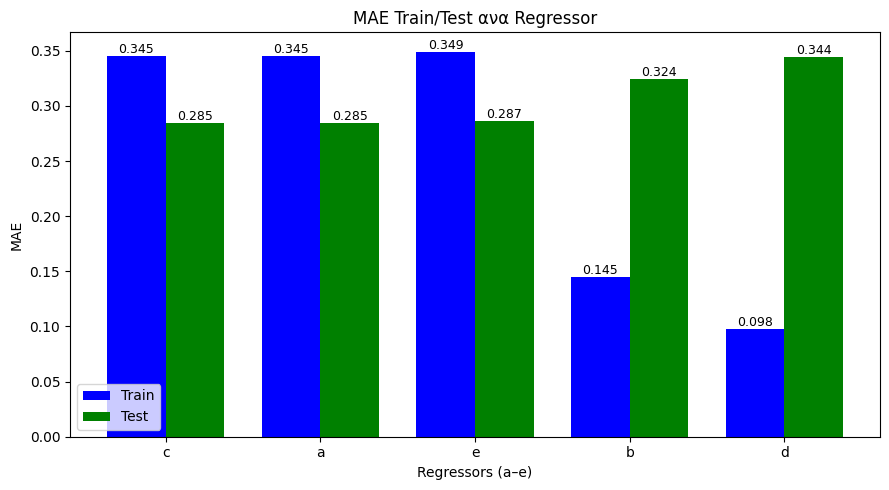

In [44]:
df_plot = results.set_index("model").loc[results["model"]]

labels = [m.split(".")[0] for m in results["model"]]  # a,b,c,d,e
x = np.arange(len(labels))
width = 0.38

plt.figure(figsize=(9,5))
plt.bar(x - width/2, df_plot["MAE_train"].to_numpy(), width=width, label="Train", color="blue")
plt.bar(x + width/2, df_plot["MAE_test"].to_numpy(),  width=width, label="Test",  color="green")
plt.xticks(x, labels)
plt.ylabel("MAE")
plt.xlabel("Regressors (a–e)")
plt.title("MAE Train/Test ανα Regressor")
plt.legend()

# προαιρετικά: τιμές πάνω από τις μπάρες
for i, v in enumerate(df_plot["MAE_train"].to_numpy()):
    plt.text(i - width/2, v, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
for i, v in enumerate(df_plot["MAE_test"].to_numpy()):
    plt.text(i + width/2, v, f"{v:.3f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


Οπου:
- c. Bagging (est Linear Regression)
- a. Linear Regressor
- e. Stacking (LR + DT) -> RF
- b. Random Forest Regressor
- d. XGBoost Regressor

### Να εξηγήσετε συνοπτικά (1-2 γραμμές)  το πως δουλεύει κάθε μοντέλο (Regressor).

- **Linear Regressor**: Μαθαινει μια γραμμικη συναρτηση $y= a + \sum b_i*x_i$ ελαχιστοποιωντας το σφαλμα, αρα προσεγγιζει καλα μονο γραμμικες σχεσεις μεταξυ Features και target.
- **Random Forest Regressor**: Συνδυαζει πολλα δεντρα εκπαιδευμενα σε τυχαια υποσυνολα δειγματων/χαρακτηριστικων. O μεσος ορος των προβλεψεων μειωνει overfitting και βελτιωνει τη γενικευση.
- **Bagging (est = Linear Regression)**: Δημιουργει πολλα bootstrapped συνολα εκπαιδευσης, εκπαιδευει ενα Linear Regression σε καθε ενα και υπολογιζει το μεσο ορο των προβλεψεων.
- **XGBoost Regressor**: Boosting απο δεντρα αποφασεων που προστιθενται διαδοχικα για να διορθωνουν τα λαθη των προηγουμενων (gradient boosting).
- **Stacking (LR + DT → RF)**: Εκπαιδευει πολλα βασικα μοντελα (Linear Regression, Decision Tree) και στη συνεχεια ενα meta-learner (Random Forest) μαθαινει να συνδυαζει τις προβλεψεις τους για καλυτερη συνολικη αποδοση.